In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('spotify_2023.csv', encoding='latin-1')

In [6]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [7]:
# Summary statistics of numeric columns
print(df.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


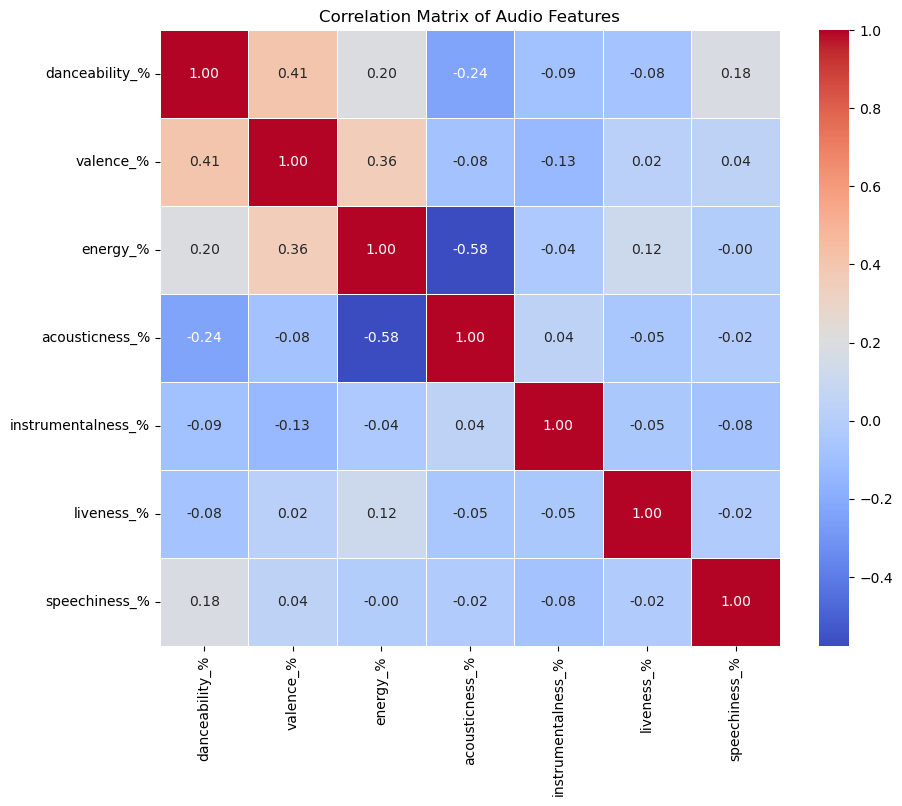

In [12]:
# Display the column names to check for case sensitivity and extra spaces
print(df.columns)

# Clean and strip any extra spaces in column names
df.columns = df.columns.str.strip().str.lower()

# Check for the correct column names with percentage symbols
correct_column_names = [col for col in df.columns if '%' in col]

# Correlation matrix for audio features with correct column names
correlation_matrix = df[correct_column_names].corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts  
count       953.000000        953.000000  
mean         51.908709          2.666317  
std          50.630241          6.035599  
min           0.000000          0.000000  
25%           7.000000          0.000000  
50%          38.000000          0.000000  
75%          87.000000          2.000000  
max         275.000000   

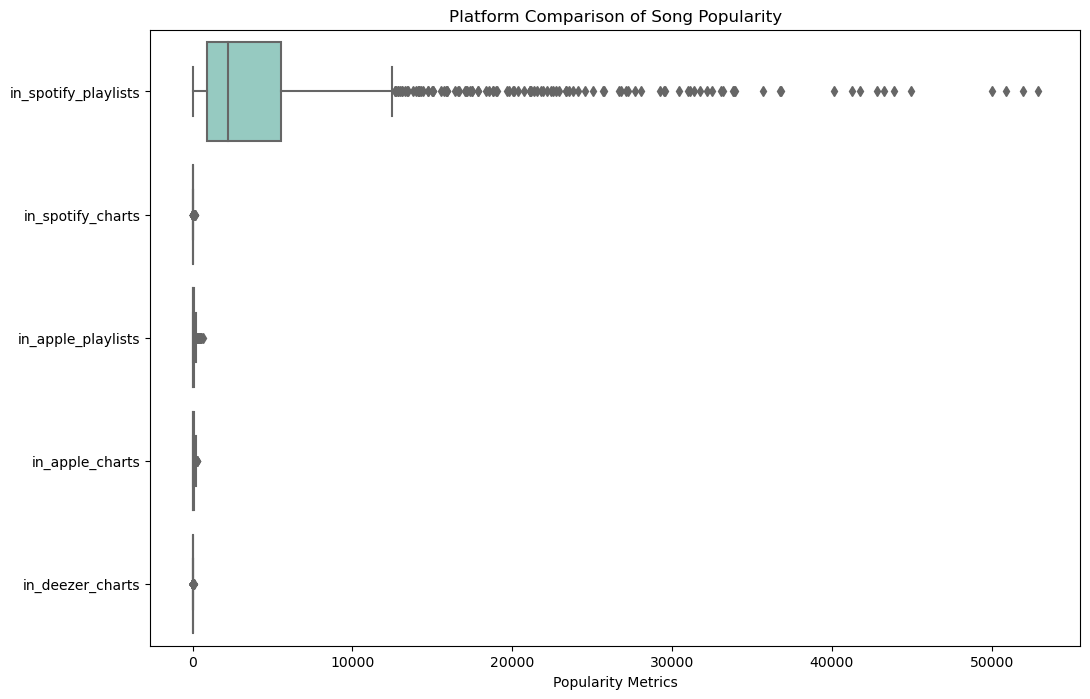

In [13]:
# Platform Comparison

# Select relevant columns for platform comparison
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
                    'in_apple_playlists', 'in_apple_charts',
                    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Display summary statistics for the selected columns
platform_summary = df[platform_columns].describe()
print(platform_summary)

# Plot platform comparison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[platform_columns], orient='h', palette='Set3')
plt.title('Platform Comparison of Song Popularity')
plt.xlabel('Popularity Metrics')
plt.show()

       in_spotify_playlists  in_apple_playlists
count            953.000000          953.000000
mean            5200.124869           67.812172
std             7897.608990           86.441493
min               31.000000            0.000000
25%              875.000000           13.000000
50%             2224.000000           34.000000
75%             5542.000000           88.000000
max            52898.000000          672.000000


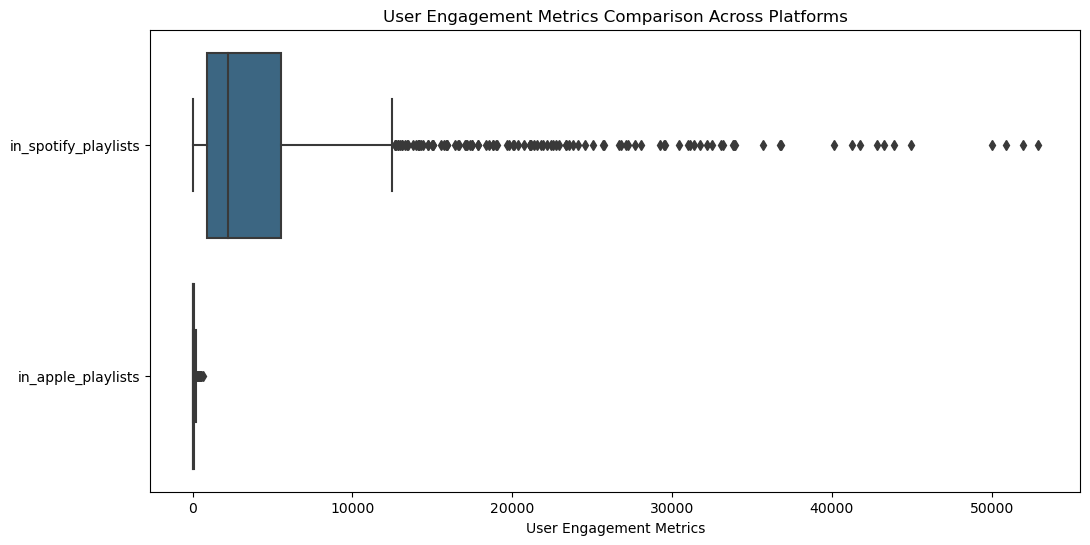

In [14]:
# Additional platform-specific engagement metrics
engagement_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Display summary statistics for the selected engagement columns
engagement_summary = df[engagement_columns].describe()
print(engagement_summary)

# Plot engagement metrics comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[engagement_columns], orient='h', palette='viridis')
plt.title('User Engagement Metrics Comparison Across Platforms')
plt.xlabel('User Engagement Metrics')
plt.show()

       artist_count
count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000


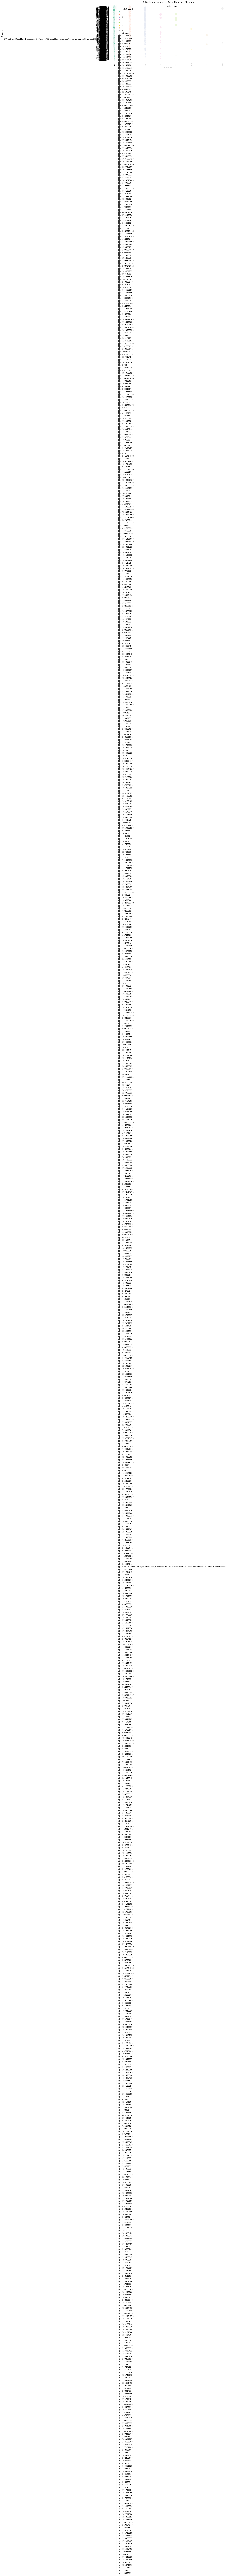

In [15]:
# Artist Impact Analysis

# Select relevant columns for artist impact analysis
artist_columns = ['artist(s)_name', 'artist_count', 'streams']

# Display summary statistics for artist-related columns
artist_summary = df[artist_columns].describe()
print(artist_summary)

# Plot artist impact metrics
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='artist_count', y='streams', hue='artist_count', palette='Set2', size='streams', sizes=(20, 200))
plt.title('Artist Impact Analysis: Artist Count vs. Streams')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.legend(title='Artist Count')
plt.show()

In [20]:
# Temporal Trends Analysis

# Convert the 'released_year' and 'released_month' columns to datetime
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-01')

# Display the first few rows of the dataset with the new 'release_date' column
print(df[['released_year', 'released_month', 'release_date']].head())

   released_year  released_month release_date
0           2023               7   2023-07-01
1           2023               3   2023-03-01
2           2023               6   2023-06-01
3           2019               8   2019-08-01
4           2023               5   2023-05-01


In [22]:
# Print the columns in the DataFrame
print(df.columns)


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'release_date'],
      dtype='object')


In [28]:
print(df_temporal_monthly.columns)


Index(['danceability_%', 'energy_%', 'valence_%', 'bpm'], dtype='object')


In [26]:
# Print the columns in the df_temporal_monthly DataFrame
print(df_temporal_monthly.columns)

Index(['danceability_%', 'energy_%', 'valence_%', 'bpm'], dtype='object')


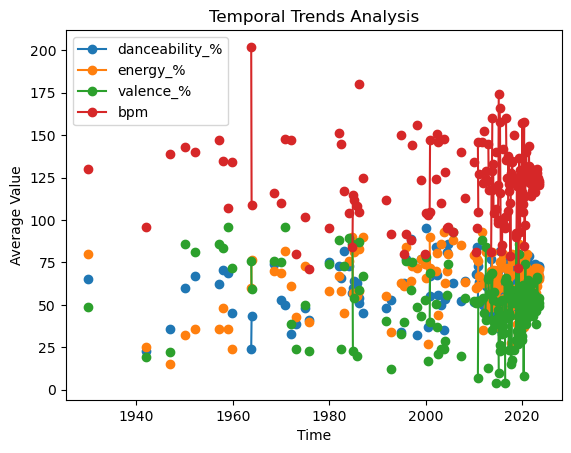

In [29]:
# Check available numeric columns
numeric_columns = df_temporal_monthly.select_dtypes(include='number').columns

# Plot relevant numeric columns
for column in numeric_columns:
    plt.plot(df_temporal_monthly.index, df_temporal_monthly[column], label=column, marker='o')

# Set plot title and labels
plt.title('Temporal Trends Analysis')
plt.xlabel('Time')
plt.ylabel('Average Value')
plt.legend()
plt.show()


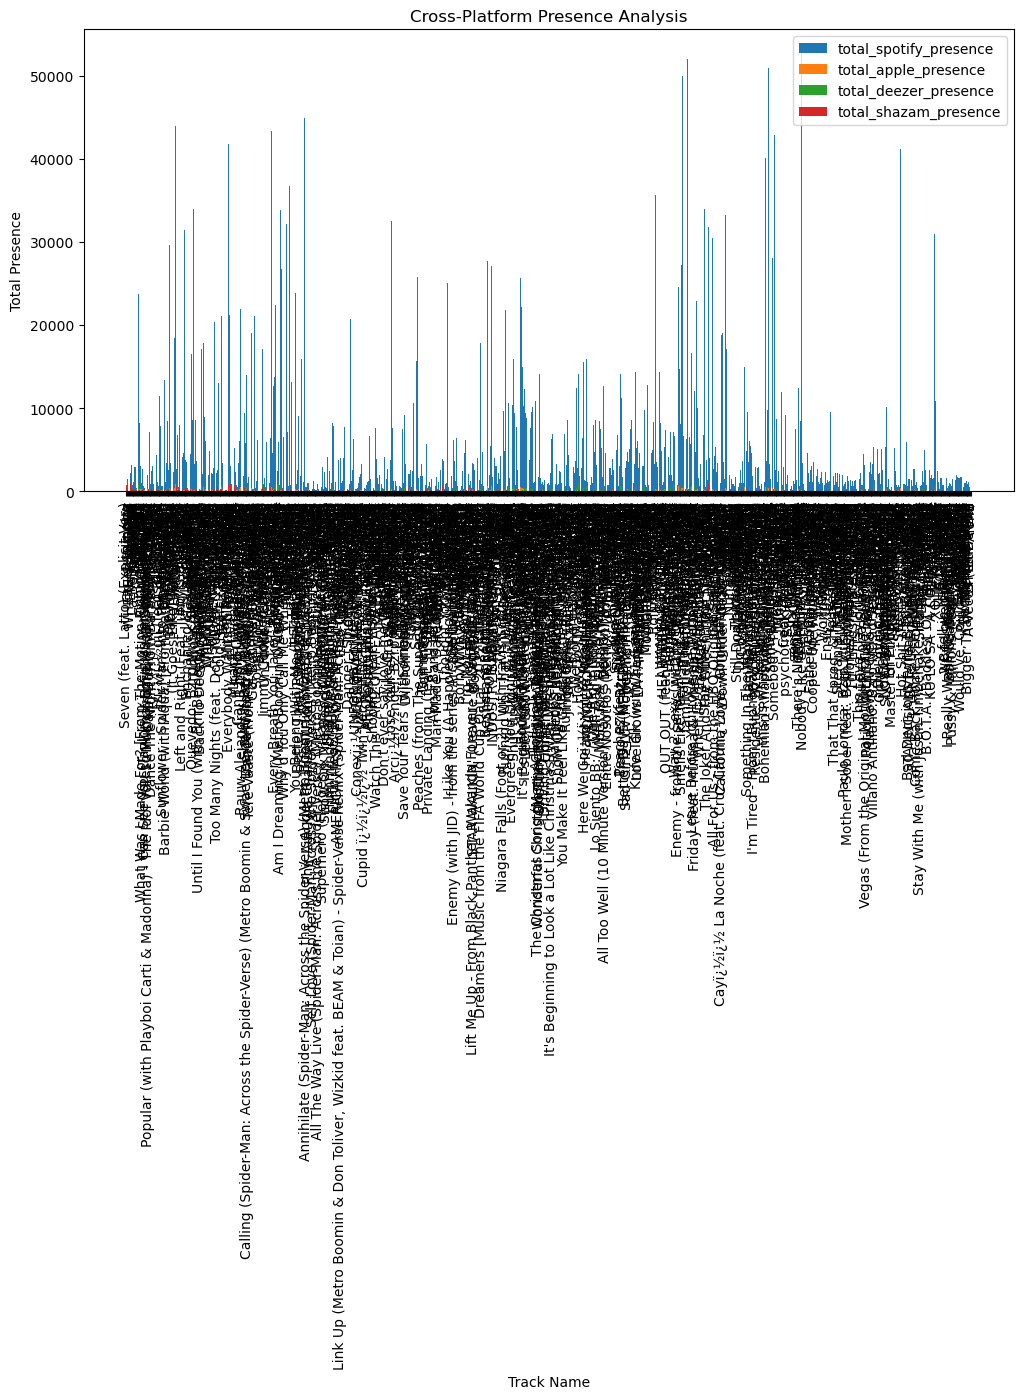

In [31]:
# Select relevant columns for cross-platform presence analysis
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Create a DataFrame for cross-platform presence analysis
df_platform = df[platform_columns]

# Convert columns to numeric
df_platform = df_platform.apply(pd.to_numeric, errors='coerce')

# Calculate the total presence for each platform
df_platform['total_spotify_presence'] = df_platform['in_spotify_playlists'] + df_platform['in_spotify_charts']
df_platform['total_apple_presence'] = df_platform['in_apple_playlists'] + df_platform['in_apple_charts']
df_platform['total_deezer_presence'] = df_platform['in_deezer_playlists'] + df_platform['in_deezer_charts']
df_platform['total_shazam_presence'] = df_platform['in_shazam_charts']

# Plot the total presence for each platform
plt.figure(figsize=(12, 6))
platform_columns_total = ['total_spotify_presence', 'total_apple_presence', 'total_deezer_presence', 'total_shazam_presence']
for column in platform_columns_total:
    plt.bar(df['track_name'], df_platform[column], label=column)

# Set plot title and labels
plt.title('Cross-Platform Presence Analysis')
plt.xlabel('Track Name')
plt.ylabel('Total Presence')
plt.legend()
plt.xticks(rotation=90)
plt.show()